## Loading Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
df = pd.read_csv('credit_risk.csv', low_memory=False)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


## Renaming features

In [11]:
#Renaming columns in the dataset with their correct names
df = df.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
df.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


## EDA

In [12]:
df.shape

(119528, 32)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [14]:
df.isna().sum()

Customer ID                                                            0
Customer has bounced in first EMI                                      0
No of times bounced 12 months                                          0
Maximum MOB                                                        34480
No of times bounced while repaying the loan                        34480
EMI                                                                34480
Loan Amount                                                        34480
Tenure                                                             34480
Dealer codes from where customer has purchased the Two wheeler     34480
Product code of Two wheeler                                        34480
No of advance EMI paid                                             34480
Rate of interest                                                   34480
Gender                                                             34480
Employment type                                    

Text(0.5, 1.0, 'Missing Values Heatmap')

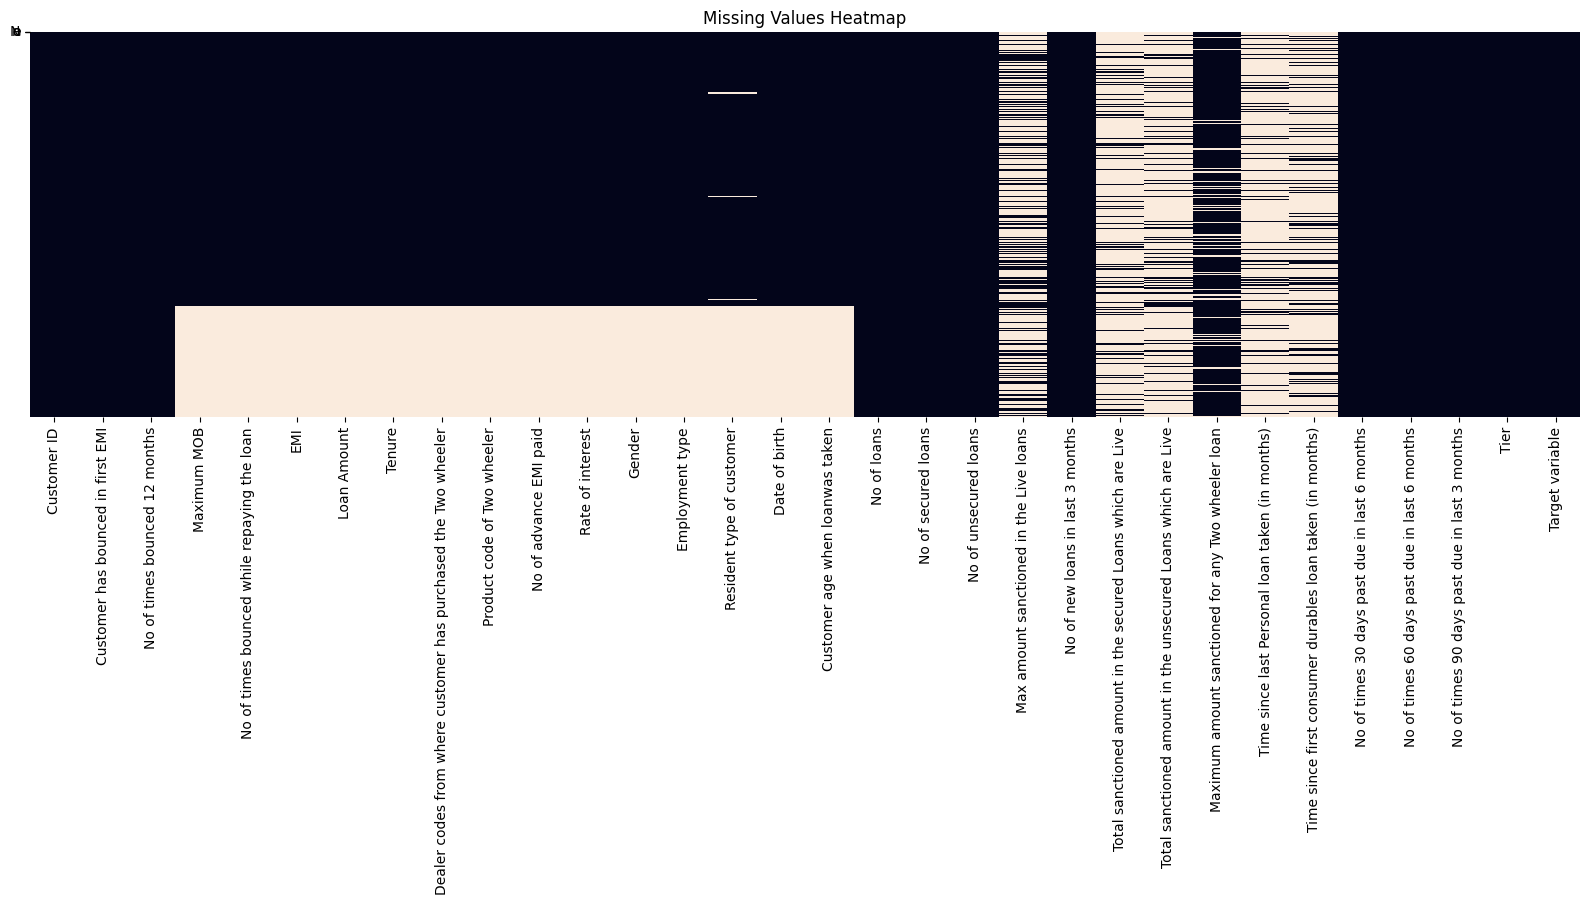

In [15]:
#missingness
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

In [16]:
#percentage of missing values
missing_percentage = df.isnull().mean() * 100
missing_percentage[missing_percentage > 0].sort_values(ascending=False)


Time since last Personal loan taken (in months)                   88.763302
Total sanctioned amount in the unsecured Loans which are Live     84.080717
Total sanctioned amount in the secured Loans which are Live       83.869052
Time since first consumer durables loan taken (in months)         82.905261
Max amount sanctioned in the Live loans                           69.357807
Resident type of customer                                         29.613982
No of times bounced while repaying the loan                       28.846797
Maximum MOB                                                       28.846797
Loan Amount                                                       28.846797
EMI                                                               28.846797
Product code of Two wheeler                                       28.846797
Tenure                                                            28.846797
Employment type                                                   28.846797
Gender      

### insights
some of the columns are missing more than 50% of its data

we will fill them with 0 save for the categorical columns


In [17]:
#standardizing column names for easier usage
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Separating the numerical variables from the categorical variables
cat_var=df.select_dtypes(include=[object])
num_var = df.select_dtypes(include=['float','int'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   customer_id                                                     119528 non-null  int64  
 1   customer_has_bounced_in_first_emi                               119528 non-null  int64  
 2   no_of_times_bounced_12_months                                   119528 non-null  int64  
 3   maximum_mob                                                     85048 non-null   float64
 4   no_of_times_bounced_while_repaying_the_loan                     85048 non-null   float64
 5   emi                                                             85048 non-null   float64
 6   loan_amount                                                     85048 non-null   float64
 7   tenure                                

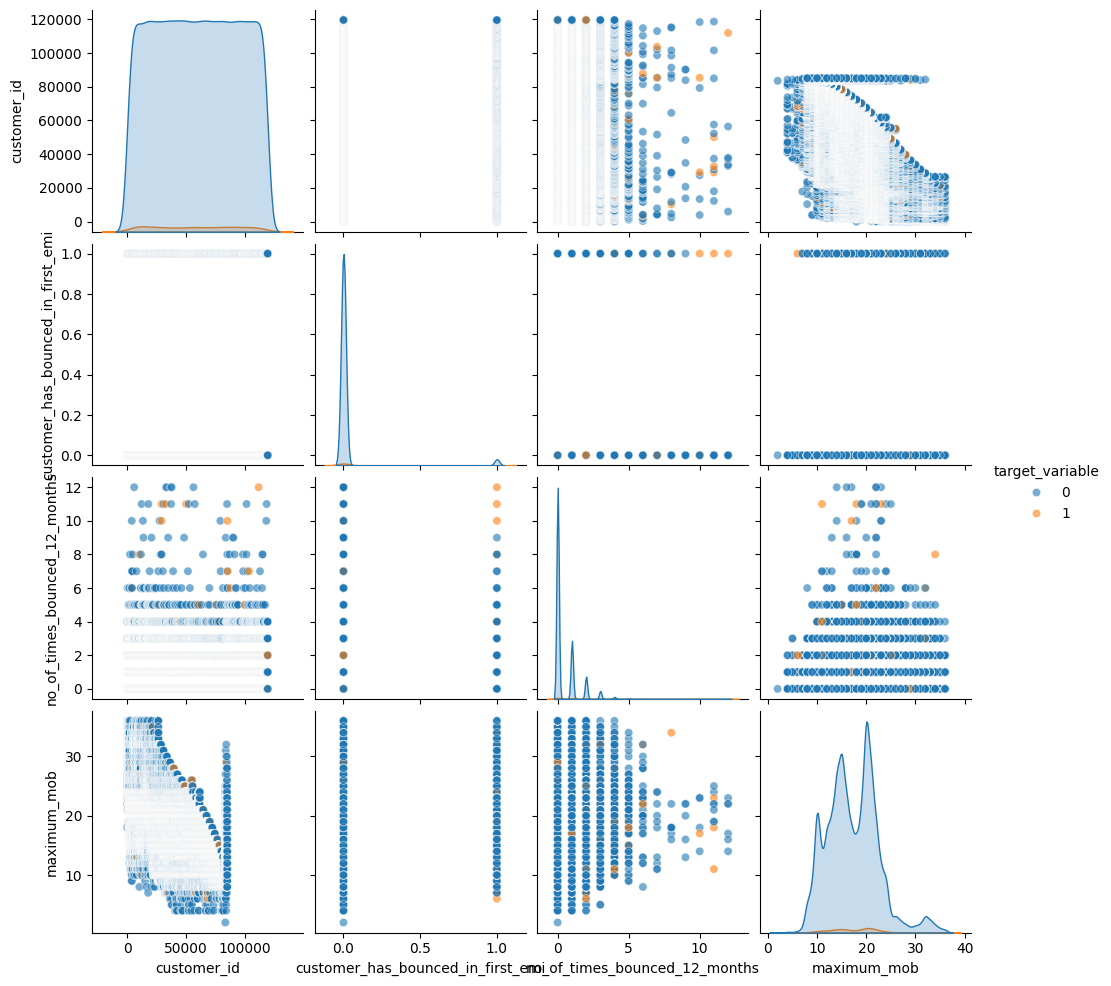

In [19]:
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
selected_cols = numeric_cols[:4] + ["target_variable"]
sns.pairplot(df[selected_cols], hue="target_variable", diag_kind="kde", plot_kws={"alpha":0.6})
plt.show()

some of these are not linearly separable

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   customer_id                                                     119528 non-null  int64  
 1   customer_has_bounced_in_first_emi                               119528 non-null  int64  
 2   no_of_times_bounced_12_months                                   119528 non-null  int64  
 3   maximum_mob                                                     85048 non-null   float64
 4   no_of_times_bounced_while_repaying_the_loan                     85048 non-null   float64
 5   emi                                                             85048 non-null   float64
 6   loan_amount                                                     85048 non-null   float64
 7   tenure                                

In [52]:
# Create "Age (years)" from "Date of birth" if present
today = pd.Timestamp("2025-09-08")  # Nairobi timezone date from system instruction
if "Date of birth" in df.columns:
    # Attempt to parse DOB robustly
    dob_parsed = pd.to_datetime(df["Date of birth"], errors="coerce", dayfirst=False, infer_datetime_format=True)
    age_years = np.floor((today - dob_parsed).dt.days / 365.25)
    df["Age (years)"] = age_years
    # Drop original DOB to avoid leakage of date-like strings
    df.drop(columns=["Date of birth"], inplace=True)

In [53]:
df.head()

,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,...,total_sanctioned_amount_in_the_secured_loans_which_are_live,total_sanctioned_amount_in_the_unsecured_loans_which_are_live,maximum_amount_sanctioned_for_any_two_wheeler_loan,time_since_last_personal_loan_taken_in_months,time_since_first_consumer_durables_loan_taken_in_months,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [54]:
#df.drop(columns=['customer_id'], inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   customer_id                                                     119528 non-null  int64  
 1   customer_has_bounced_in_first_emi                               119528 non-null  int64  
 2   no_of_times_bounced_12_months                                   119528 non-null  int64  
 3   maximum_mob                                                     85048 non-null   float64
 4   no_of_times_bounced_while_repaying_the_loan                     85048 non-null   float64
 5   emi                                                             85048 non-null   float64
 6   loan_amount                                                     85048 non-null   float64
 7   tenure                                

In [56]:
target_col = df['target_variable']

In [57]:
# Ensure target is binary integer {0,1} if possible
# If the target is string categories like "Good"/"Bad", convert to 0/1
if df['target_variable'].dtype == "O":
    # Map the most frequent class to 0, the other to 1 if binary
    if df[target_col].nunique() == 2:
        classes = df[target_col].value_counts().index.tolist()
        mapping = {classes[0]: 0, classes[1]: 1}
        df[target_col] = df[target_col].map(mapping)
    else:
        # Try to coerce to numeric
        df[target_col] = pd.to_numeric(df[target_col], errors="coerce")

In [58]:
df['target_variable'].dtype

dtype('int64')

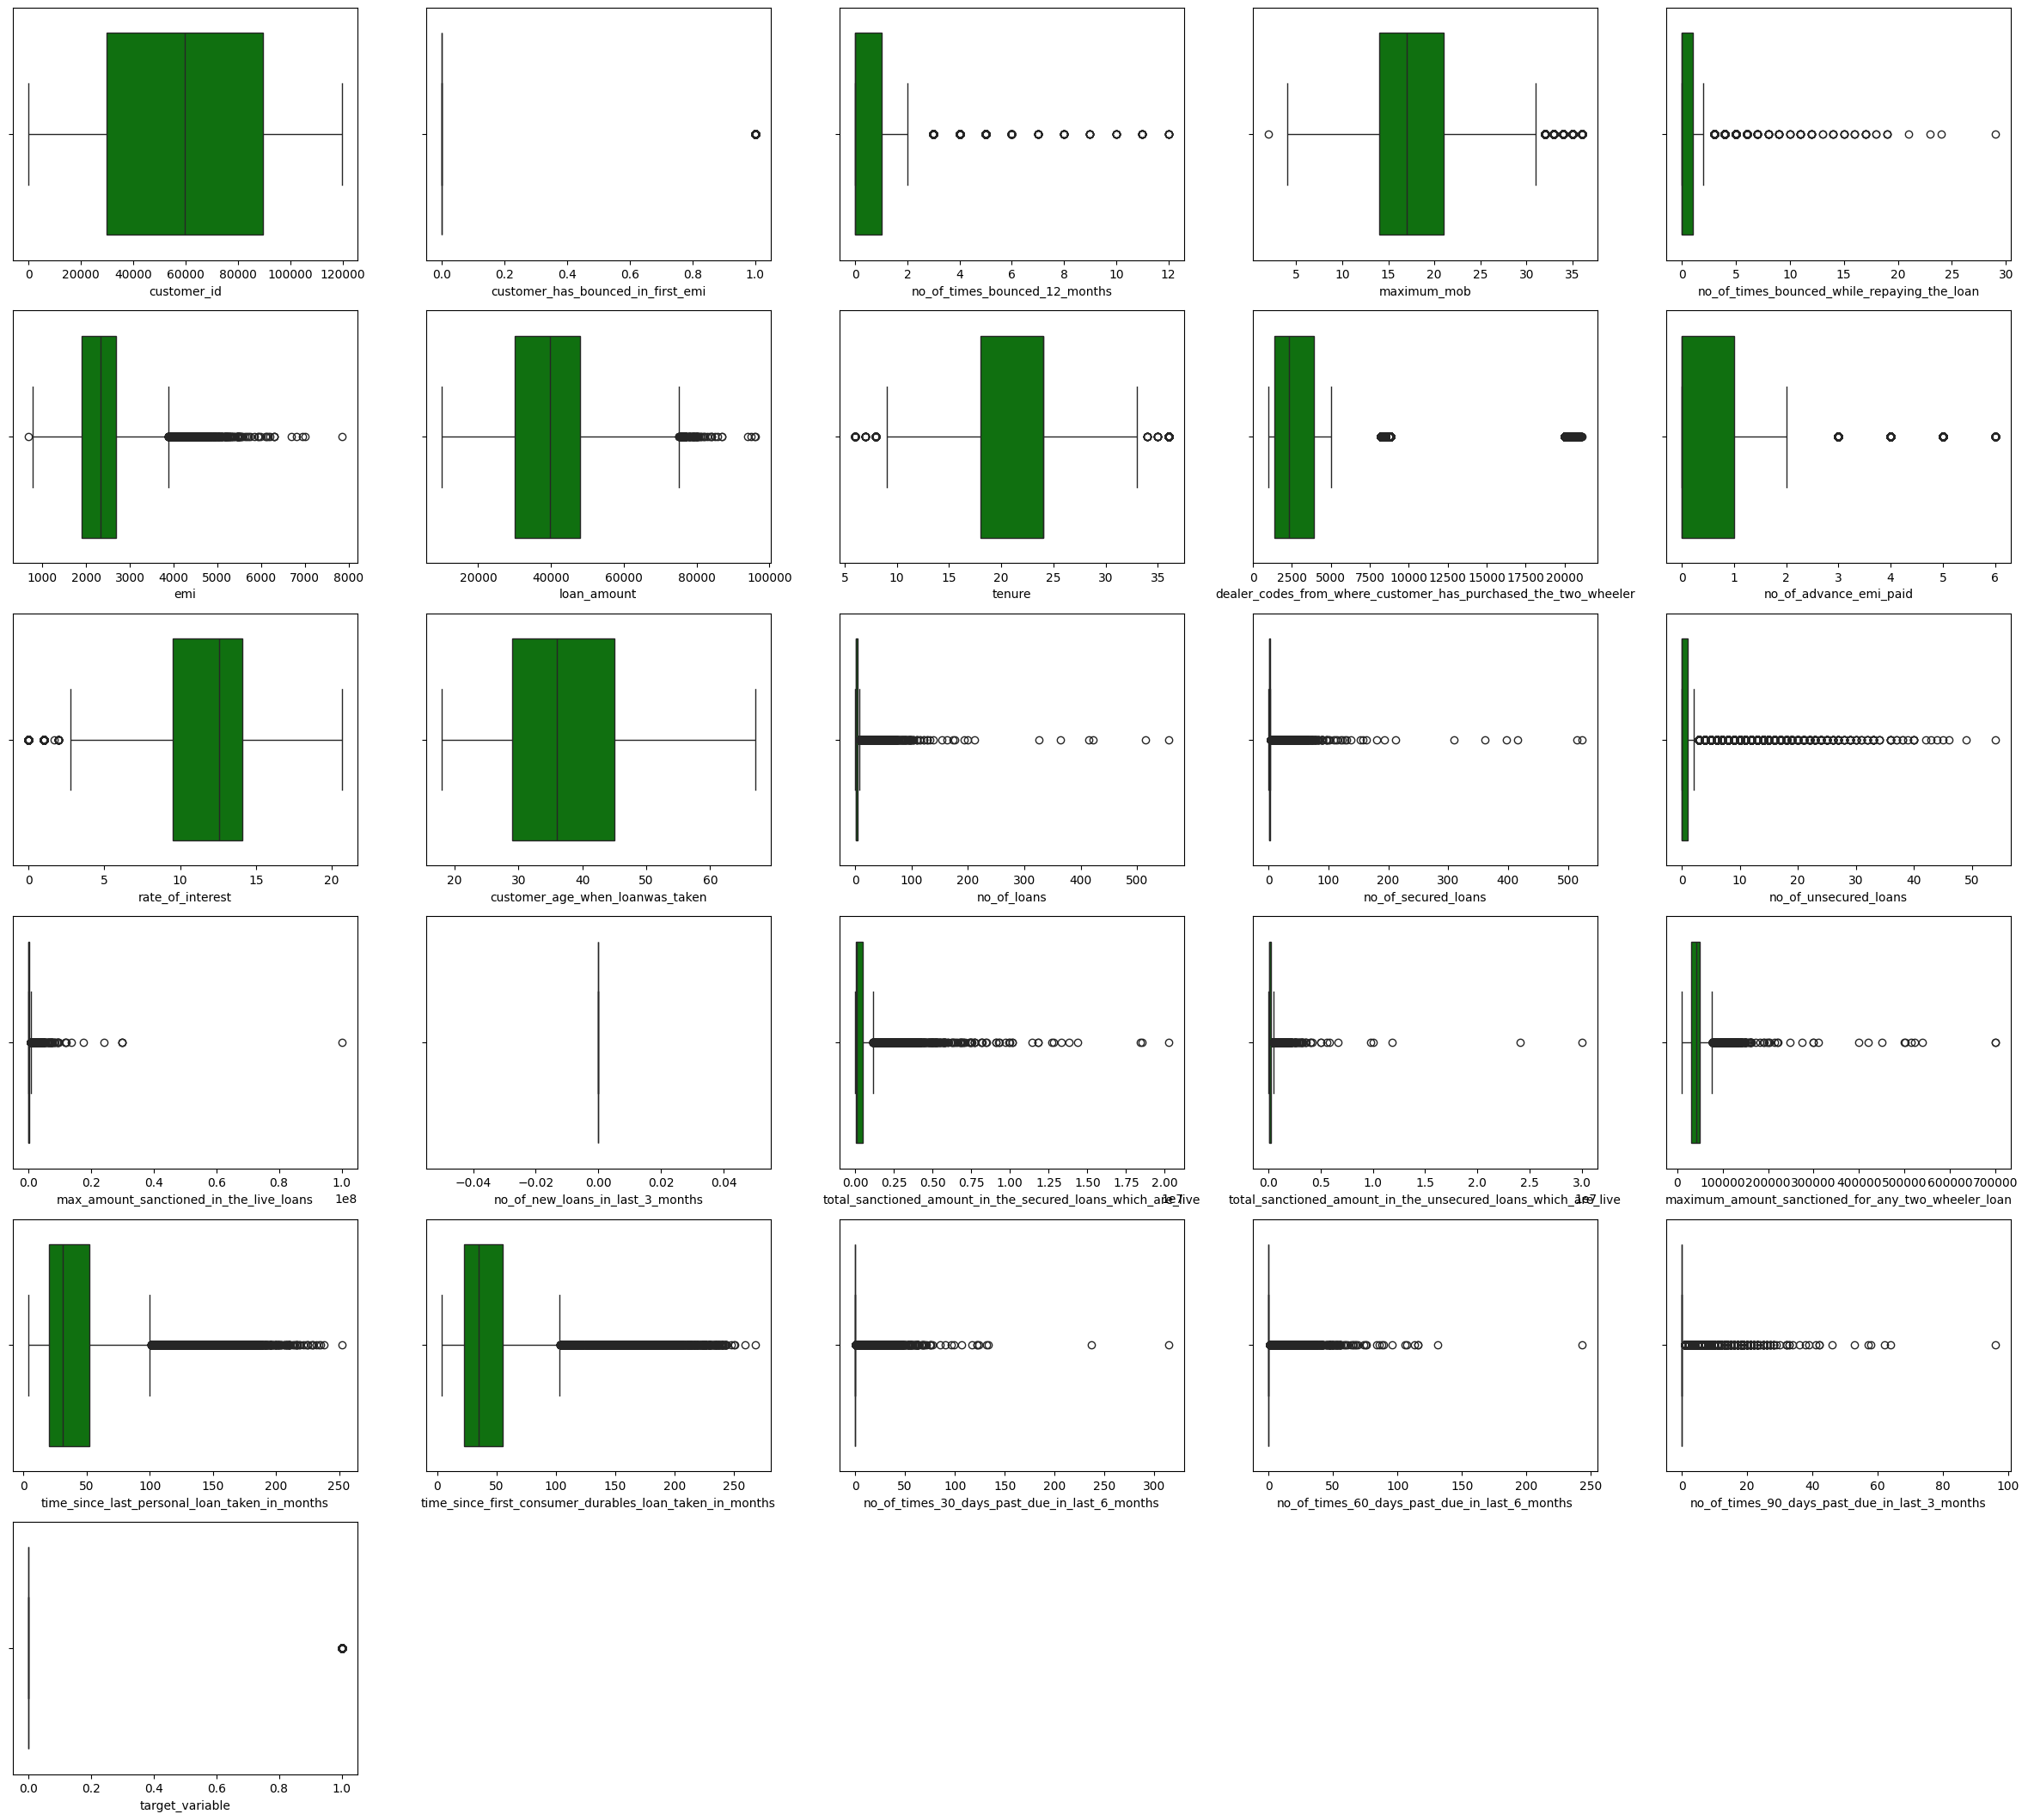

In [59]:
#Outliers analysis of numerical variables

fig = plt.figure(figsize=(30,45))
for i,j in zip(num_var,range(len(num_var.columns))):
    ax = fig.add_subplot(10,5, j+1)
    sns.boxplot(data=df,x=df[i],color="Green")

some features have outliers

Text(0.5, 1.0, 'Ratio of Customers Who Defaulted and Who did Not')

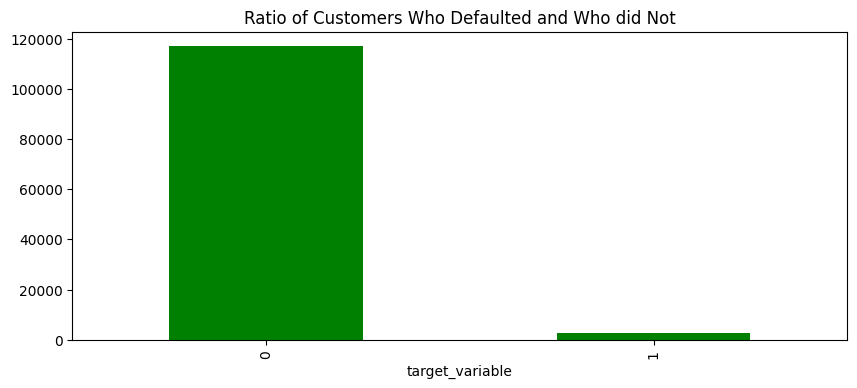

In [62]:
#plotting
df['target_variable'].value_counts().plot(kind = "bar", figsize = (10,4),color='Green')
plt.title("Ratio of Customers Who Defaulted and Who did Not")

### insight 
there is a clear case of class imbalance in the target variable which we can solve by using the SMOTE method


In [75]:
# handle missingness
# List of specific numerical columns to replace with zero
num_missing_columns_zero = ['maximum_mob','no_of_times_bounced_while_repaying_the_loan',
                       'emi','loan_amount','tenure',
                       'dealer_codes_from_where_customer_has_purchased_the_two_wheeler',
                       'no_of_advance_emi_paid',
                       'rate_of_interest',
                       'customer_age_when_loanwas_taken',
                       'max_amount_sanctioned_in_the_live_loans',
                       'maximum_amount_sanctioned_for_any_two_wheeler_loan',
                       'total_sanctioned_amount_in_the_secured_loans_which_are_live',
                       'total_sanctioned_amount_in_the_unsecured_loans_which_are_live',
                       'time_since_last_personal_loan_taken_in_months',
                       'time_since_first_consumer_durables_loan_taken_in_months']
# replace the missing values with a zero
df[num_missing_columns_zero] = df[num_missing_columns_zero].fillna(0)

#### insight
imputing these columns with zero as they dropping them would lead to us losing a third of the data

imputing with medians would also not make sense as the data requires extensive domain knowledge before imputing with median or mode

In [64]:
# handling missing values
cat_columns_other = ['product_code_of_two_wheeler',
                             'gender',
                             'employment_type',
                             'resident_type_of_customer']
# replace with other
df[cat_columns_other] = df[cat_columns_other].fillna('other')

### insight
imputing the categorical columns with other instead of 0 to avoid miscalculatiions of assuming the missing data to picking up a zero value

In [65]:

# Encoding
# Separating the numerical variables from the categorical variables
cat_var=df.select_dtypes(include=[object])
num_var = df.select_dtypes(include=['float','int'])
# Encoding
# Separating the numerical variables from the categorical variables
cat_var=df.select_dtypes(include=[object])
num_var = df.select_dtypes(include=['float','int'])

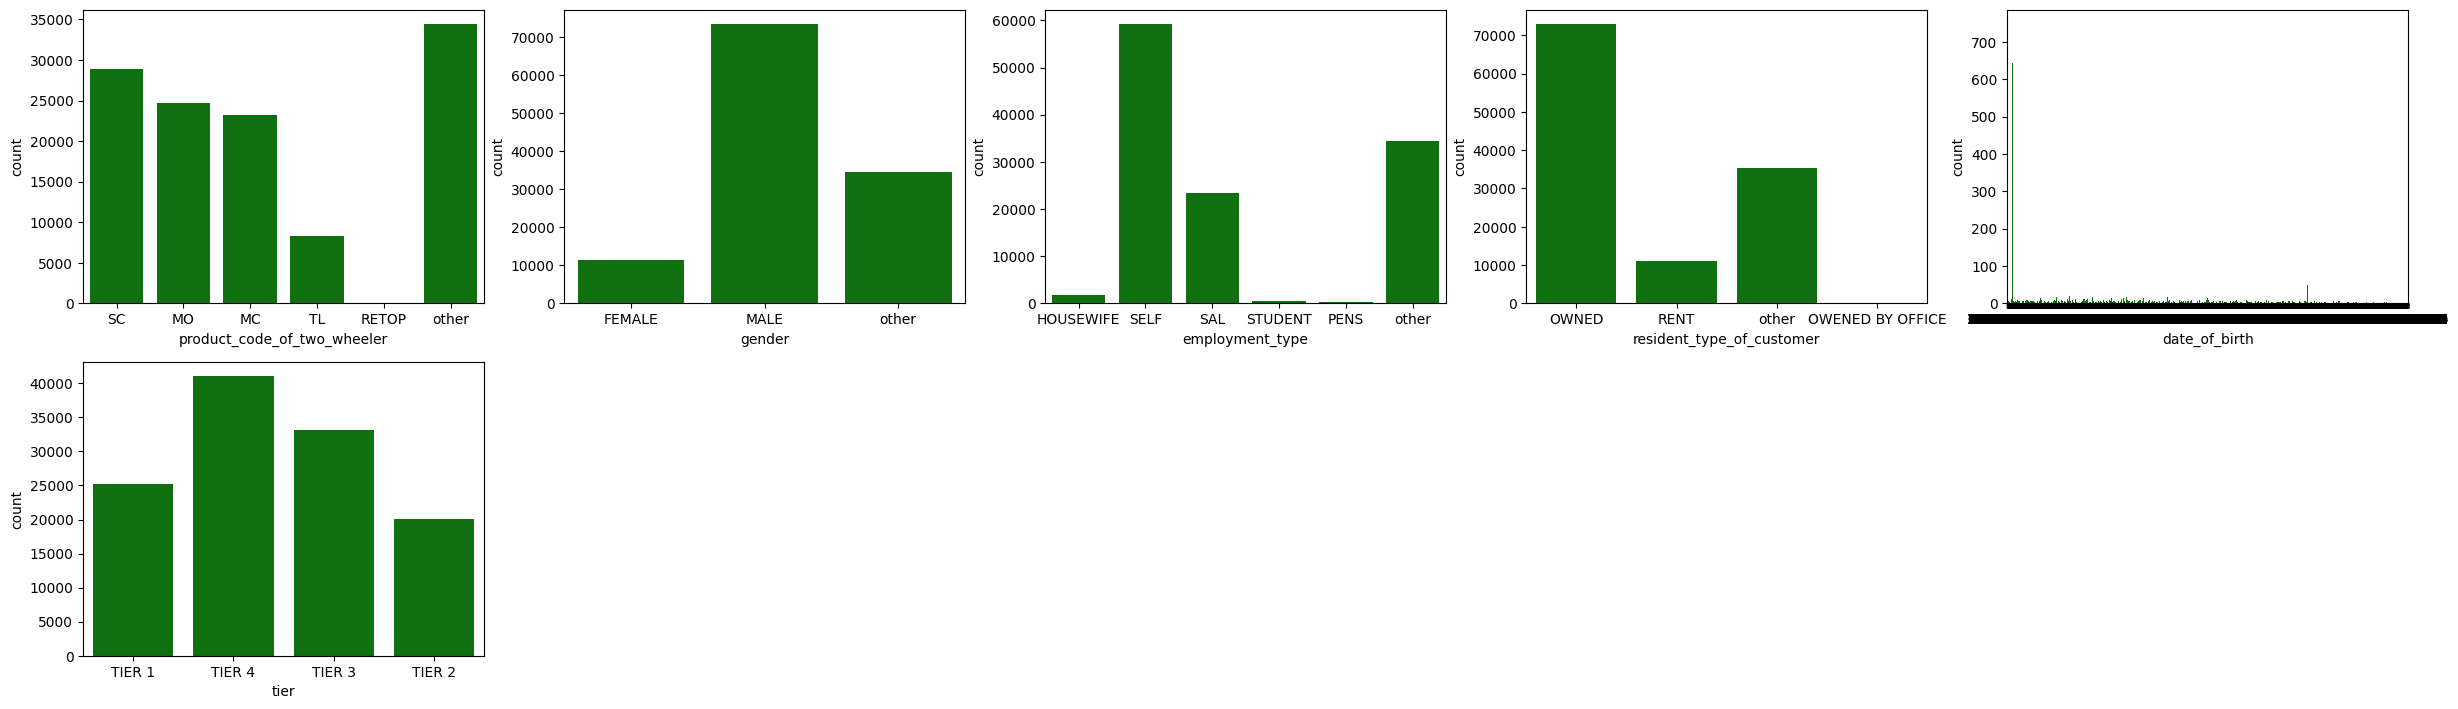

In [67]:
# plot the categorical variables
fig = plt.figure(figsize=(30,45))
for i,j in zip(cat_var,range(len(cat_var.columns))):
    ax = fig.add_subplot(10,5, j+1)
    sns.countplot(data=df,x=df[i],color="Green")

we see tier 1, 2, 3, 4 as ordinal data which we will encode using the ordinal encoder

In [96]:
X=df.drop('target_variable',axis=1)
y=df['target_variable']

In [80]:
# checking if there are any missing values in the target variable
X.isna().sum()

customer_id                                                           0
customer_has_bounced_in_first_emi                                     0
no_of_times_bounced_12_months                                         0
maximum_mob                                                           0
no_of_times_bounced_while_repaying_the_loan                           0
emi                                                                   0
loan_amount                                                           0
tenure                                                                0
dealer_codes_from_where_customer_has_purchased_the_two_wheeler        0
product_code_of_two_wheeler                                           0
no_of_advance_emi_paid                                                0
rate_of_interest                                                      0
gender                                                                0
employment_type                                                 

In [83]:
import datetime

In [88]:
df.date_of_birth = pd.to_datetime(df['date_of_birth'], dayfirst=True,errors='coerce')
df['age'] = df['date_of_birth'].apply(lambda x: datetime.now().year - x.year - ((datetime.now().month, datetime.now().day) < (x.month, x.day)))
df.drop('date_of_birth', axis=1, inplace=True)

# replace missing values for age with median
df['age'] = df['age'].fillna(df['age'].median())

Text(0.5, 1.0, 'Missing Values Heatmap')

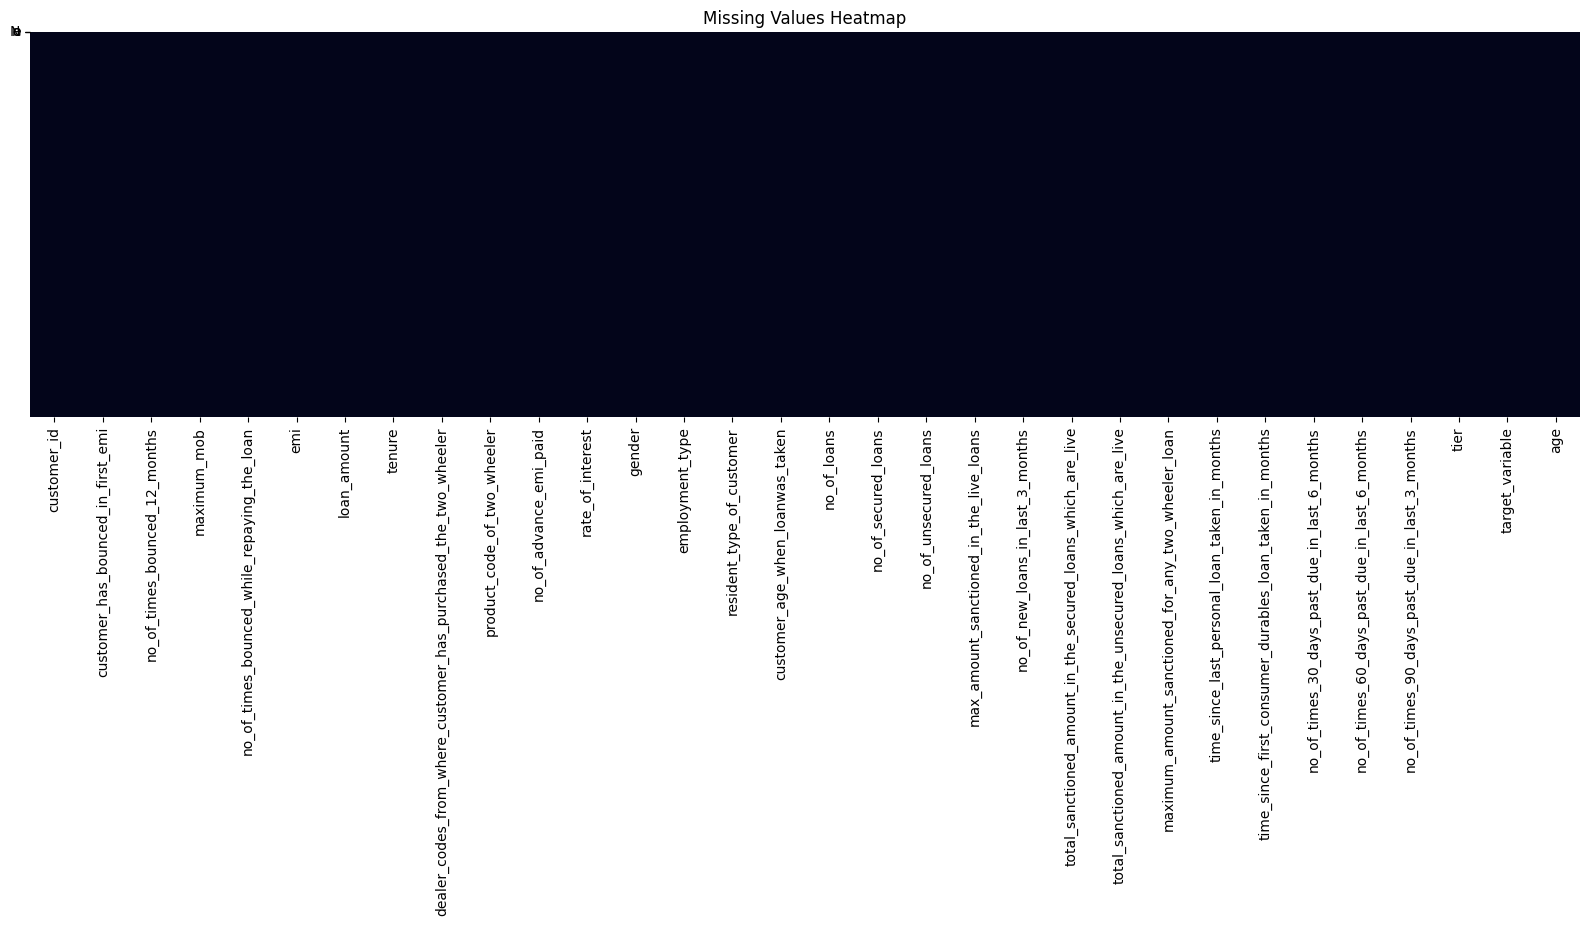

In [89]:
#missingness
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

## Handling Imbalance

In [ ]:
%pip install imblearn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler,  PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Class Imbalance
from imblearn.over_sampling import SMOTE

## Model Selection and Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

In [97]:
#tier is ordinal data..
transform_col = make_column_transformer(
                                        (OrdinalEncoder(),['tier']),
                                        (OneHotEncoder(), ['product_code_of_two_wheeler','gender','employment_type','resident_type_of_customer']),
                                         remainder="passthrough")
X = transform_col.fit_transform(X)


In [98]:
# Handling Imbalance
print(X.shape,y.shape, 'before_resapmpling')
sm = SMOTE(random_state=42,sampling_strategy=0.2)
X, y = sm.fit_resample(X, y)
print(X.shape,y.shape,'after_resapmpling')

(119528, 46) (119528,) before_resapmpling
(140296, 46) (140296,) after_resapmpling


In [103]:
class WinsorizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.01, upper_quantile=0.99):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile
    def fit(self, X, y=None):
        X = np.asarray(X, dtype=float)
        self.lower_ = np.nanquantile(X, self.lower_quantile, axis=0)
        self.upper_ = np.nanquantile(X, self.upper_quantile, axis=0)
        return self
    def transform(self, X):
        X = np.asarray(X, dtype=float)
        return np.clip(X, self.lower_, self.upper_)


In [99]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Models

In [108]:
# model selection
# Logistic Regression (No Regularisation)
pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',max_iter=10000))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="f1_weighted")
print(scores, scores.mean())

[0.81439687 0.8199852  0.81850505 0.81670273 0.81613707] 0.8171453818610424


In [ ]:
# Support vector classification with Linear Kernel
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=1), LinearSVC(C=5))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.84044395 0.84466959 0.84186141 0.84043582 0.84094496] 0.8416711459341965


## Non-Linear Models

In [123]:
# classification - Random Forest
pipe = make_pipeline(RobustScaler(),RandomForestClassifier())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="f1_weighted")
print(scores, scores.mean())

[0.97767328 0.9777804  0.97714452 0.97735967 0.97570433] 0.9771324395827452


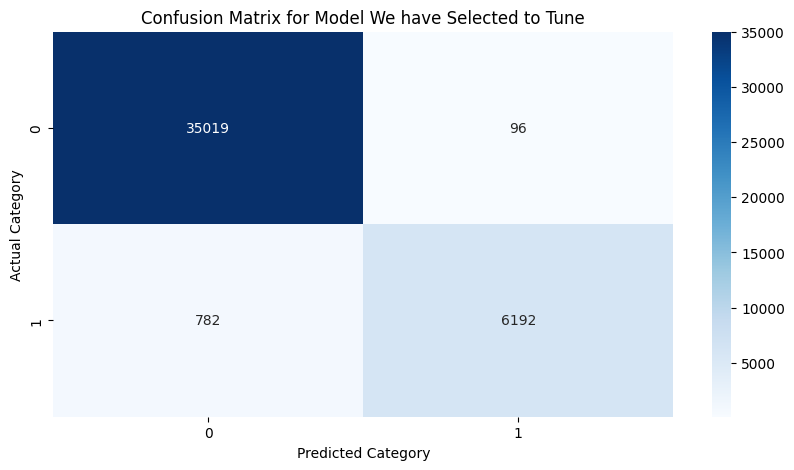

In [114]:
# Lets inspect our model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

#Visualise the matrix
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Confusion Matrix for Model We have Selected to Tune")
plt.show()


In [118]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary", zero_division=0)
recall = recall_score(y_test, y_pred, average="binary", zero_division=0)
f1 = f1_score(y_test, y_pred, average="binary", zero_division=0)

print("Model Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Model Performance:
Accuracy : 0.9791
Precision: 0.9847
Recall   : 0.8879
F1 Score : 0.9338


In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pipe.fit(X_train, y_train)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    metrics = {}

    for split, (X, y) in {"Train": (X_train, y_train), "Test": (X_test, y_test)}.items():
        y_pred = model.predict(X)

        accuracy  = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average="binary", zero_division=0)
        recall    = recall_score(y, y_pred, average="binary", zero_division=0)
        f1        = f1_score(y, y_pred, average="binary", zero_division=0)

        metrics[split] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1
        }

    return metrics

# usage
results = evaluate_model(pipe, X_train, y_train, X_test, y_test)

print("Training Performance:")
for k, v in results["Train"].items():
    print(f"{k}: {v:.4f}")

print("\nValidation (Test) Performance:")
for k, v in results["Test"].items():
    print(f"{k}: {v:.4f}")


Training Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000

Validation (Test) Performance:
Accuracy: 0.9791
Precision: 0.9853
Recall: 0.8870
F1: 0.9336


Non-linear models like the Random Forest Classifier tend to work better than the logistic one as the dataset seems more non-linear